In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('vocal_data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.drop('name',inplace=True,axis=1)
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
y = df['status']
x = df.drop('status',axis=1)

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=34)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logmodel1 = LogisticRegression()
logmodel1.fit(xtrain,ytrain)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# we get an error that total number of iterations was reached 
# Therefore, we attempt to scale the independent variables according to their mean and variance

In [9]:
a = pd.DataFrame(x,index=None)
for i in a.columns:
    mean = np.mean(a[i])
    std = np.std(a[i])
    a[i] = (a[i]-mean)/std
a.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [10]:
x = a.squeeze()
y = df['status']

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=34)

In [12]:
logmodel2 = LogisticRegression()
logmodel2.fit(xtrain,ytrain)

LogisticRegression()

In [13]:
predictions = logmodel2.predict(xtest)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(ytest,predictions)

array([[ 6,  2],
       [ 2, 29]])

In [15]:
print(classification_report(ytest,predictions))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



In [16]:
# We can implement a forward, backward or stepwise algorithm to determine the most important
# indepenedent variables from the ones available

In [17]:
# For this, we make use of native packages in R language

In [18]:
# Using R, we have calculated 3 sets of dependent variables for each method

In [19]:
# Forward selection adds every possible variable and is thus disregarded

In [20]:
# Backward and stepwise selection both include the same variables in the model

In [21]:
xtrain.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [22]:
selection = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)',
             'MDVP:Jitter(Abs)', 'Jitter:DDP', 'MDVP:Shimmer', 
             'RPDE', 'spread1', 'spread2']


In [23]:
selected_xtrain = xtrain[selection]
selected_xtrain.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'Jitter:DDP', 'MDVP:Shimmer', 'RPDE', 'spread1', 'spread2'],
      dtype='object')

In [24]:
ss_logmodel = LogisticRegression()
ss_logmodel.fit(selected_xtrain, ytrain)

LogisticRegression()

In [25]:
selected_xtest = xtest[selection]
ss_predictions = ss_logmodel.predict(selected_xtest)

In [26]:
print(confusion_matrix(ss_predictions, ytest))

[[ 5  1]
 [ 3 30]]


In [27]:
print(classification_report(ss_predictions, ytest))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.97      0.91      0.94        33

    accuracy                           0.90        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.92      0.90      0.90        39



In [28]:
# Use of the subset of variables does not provide any significant increase in the accuracy
# Therefore, a different method for reducing the number of features is required

In [29]:
# Lasso Regression:

In [30]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(xtrain, ytrain)

LogisticRegression(penalty='l1', solver='liblinear')

In [31]:
l_predictions = lasso_model.predict(xtest)
print(classification_report(l_predictions, ytest))
print(confusion_matrix(l_predictions, ytest))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39

[[ 6  2]
 [ 2 29]]


In [32]:
lasso_model.coef_

array([[-0.15813281, -0.14858422, -0.15335058,  0.        , -0.22991604,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.9164597 ,  0.        , -0.16564393,
         0.        , -0.49800225,  0.15259318,  1.3461944 ,  0.29587205,
         0.61695768,  0.53832736]])

In [33]:
# Clearly, the lasso method has forced some of the co-efficients to zero
# However, this does not result in a significant increase in accuracy

In [34]:
# We can use recursive feature selection to decrease the number of variables in the model
# this method selects the top n most important variables

In [35]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [36]:
# Since we have 22 variables in total
# We can select any number of features between 1 and 22
# For convenience we will take the number of features between 5 and 17

In [37]:
results = {}
for i in range(1,23):
    rfemodel = LogisticRegression()
    rfe = RFE(estimator = rfemodel, n_features_to_select=i)
    rfe.fit(xtrain, ytrain)
    
    xtrain_rfe = rfe.transform(xtrain)
    xtest_rfe = rfe.transform(xtest)
    
    rfemodel.fit(xtrain_rfe, ytrain)
    
    ypred = rfemodel.predict(xtest_rfe)
    
    accuracy = accuracy_score(ytest, ypred)
    print('Accuracy with {} variables: {}'.format(i,accuracy))
    results[i] = accuracy
    print(classification_report(ytest,ypred))

Accuracy with 1 variables: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39

Accuracy with 2 variables: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39

Accuracy with 3 variables: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92 

In [38]:
print(results)

{1: 0.9230769230769231, 2: 0.9230769230769231, 3: 0.9230769230769231, 4: 0.9230769230769231, 5: 0.9230769230769231, 6: 0.9230769230769231, 7: 0.8974358974358975, 8: 0.8974358974358975, 9: 0.8974358974358975, 10: 0.8974358974358975, 11: 0.8974358974358975, 12: 0.8974358974358975, 13: 0.8974358974358975, 14: 0.8974358974358975, 15: 0.8974358974358975, 16: 0.8974358974358975, 17: 0.8974358974358975, 18: 0.8974358974358975, 19: 0.8974358974358975, 20: 0.8974358974358975, 21: 0.8974358974358975, 22: 0.8974358974358975}


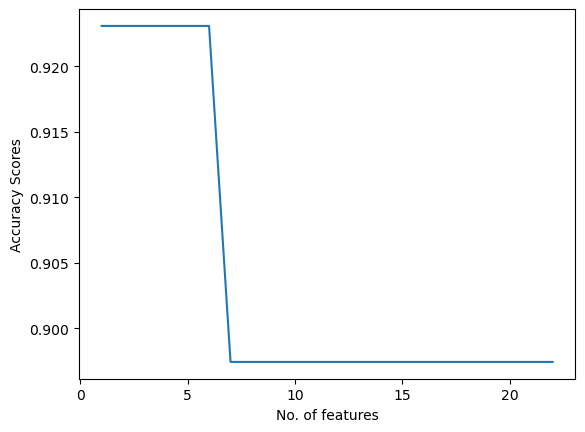

In [39]:
import matplotlib.pyplot as plt
keys = results.keys()
values = results.values()
plt.plot(keys, values)
plt.xlabel('No. of features')
plt.ylabel('Accuracy Scores')
plt.show()

In [40]:
# Clearly, increasing the number of features included does not provide any 
# signficant improvement in accuracy. 